In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# komponenty do budowy sieci
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.random import set_seed



In [3]:
set_seed(0)

In [4]:
df = pd.read_csv("http://51.91.120.89/extras/train.csv")
df.sample(n=5)

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
160,160,0.0,-0.182,-0.978,-0.623,-0.395,-1.456,0.478,-1.834,-0.477,-0.537,0.434,-0.378,0.499,-1.047,-0.425,0.477,0.194,0.157,0.652,-0.385,-0.386,1.349,-0.166,0.530,-0.422,1.122,0.815,1.560,0.088,-0.223,0.687,-0.643,-0.017,-0.592,-0.393,1.574,-0.773,0.263,-0.975,...,-0.570,-1.155,-1.012,-0.832,-0.926,0.411,1.647,0.861,-0.763,-0.324,0.276,-0.796,0.204,-1.285,0.565,-1.449,2.132,1.196,0.499,-1.020,1.232,0.972,-0.471,-0.341,0.049,1.292,-0.470,0.522,-1.360,-0.414,-0.755,0.773,1.903,0.102,1.029,0.455,0.387,0.874,-0.012,1.400
35,35,0.0,-0.057,0.369,0.338,-0.304,-1.071,-2.277,0.999,-0.828,-0.878,-0.656,0.793,-0.281,-1.499,-0.519,-1.357,-0.238,0.187,-0.956,-0.415,-0.270,0.031,-0.266,0.420,0.166,0.816,-0.165,-2.148,-0.233,1.727,1.193,0.517,0.427,0.114,0.707,-0.266,0.060,0.602,-0.250,...,0.566,0.255,0.246,-1.696,2.370,-3.467,-0.942,-1.123,-1.634,0.204,0.419,1.550,-0.283,-0.276,0.133,-0.132,-1.388,1.306,1.943,0.037,1.635,-0.009,-1.009,0.393,-0.329,-0.762,-1.416,-0.961,0.494,1.157,-1.704,-1.125,-0.076,-0.848,0.857,-0.628,0.459,-2.166,-0.250,0.997
245,245,1.0,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,0.896,1.416,0.149,-0.194,0.552,-0.073,-1.353,-1.485,0.368,0.110,-0.367,-1.833,0.414,0.664,0.956,-1.941,-0.868,0.522,-1.463,-1.148,0.107,-1.592,-0.944,-0.238,-1.372,-3.606,1.378,-1.453,-0.286,0.322,...,1.654,3.137,-1.742,-0.198,-0.307,0.875,1.118,2.177,-1.711,-1.404,1.037,-0.003,-0.295,-1.068,-0.047,0.544,1.333,-0.593,0.303,2.532,-0.743,1.965,0.945,-2.125,-0.511,0.175,1.263,-1.750,-0.846,0.575,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
6,6,1.0,1.257,-1.562,0.832,0.432,1.667,0.843,-0.037,-0.960,-0.311,0.173,-0.059,1.744,-0.920,-0.077,-0.818,-2.053,-2.042,0.219,0.508,-0.659,0.063,-0.443,1.086,-2.087,0.227,1.854,0.211,0.172,0.815,-0.013,-0.408,-1.385,1.200,-0.020,0.554,-0.076,0.452,-0.147,...,-0.604,0.566,1.239,0.270,0.588,-0.207,-1.395,-1.579,-0.141,-0.236,-0.538,0.061,0.642,0.118,-0.150,-1.399,-0.423,0.553,-0.857,0.393,0.958,-0.124,1.379,-0.748,0.218,-1.407,-0.739,0.590,0.044,-0.268,0.024,0.391,0.547,-0.416,-0.333,0.857,0.422,-0.833,-1.055,0.439
125,125,0.0,-0.303,-0.099,0.476,-0.628,-0.317,-0.468,-1.035,1.874,1.157,1.003,0.290,0.093,-1.749,-1.052,-0.593,-0.362,-1.506,1.492,-0.808,-0.966,0.219,-0.059,0.554,0.038,1.429,1.362,0.435,-0.291,-1.458,-1.104,-0.081,-0.342,-0.096,0.660,-0.397,0.771,-0.138,-0.300,...,-0.422,-0.226,0.184,0.376,-1.130,0.367,-0.940,1.109,1.952,0.476,-1.646,0.205,0.269,-0.540,-1.025,0.868,-0.270,-0.266,0.076,-0.528,1.005,0.578,-2.662,0.746,-0.374,0.916,-0.689,-0.455,-0.148,-1.757,-1.212,1.496,-0.077,1.065,-0.229,-1.212,0.562,-0.019,-3.006,0.761


In [5]:
X = df.iloc[ : , 2:]
y = df.target.astype('int')

In [6]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [8]:
model = Sequential()

model.add( Dense(300, input_dim=300 , activation="relu") )
model.add( Dense(128, activation="relu") )
model.add( Dense(64, activation="relu") )
model.add( Dense(1, activation="sigmoid") )

model.compile(loss="binary_crossentropy", metrics="accuracy")

result = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=0)

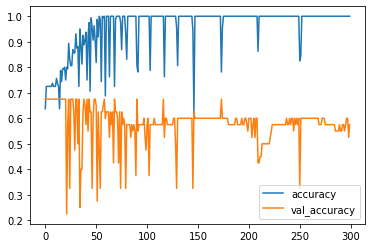

In [9]:
df1 = pd.DataFrame(result.history)
df1[ ["accuracy", "val_accuracy"] ].plot()

In [10]:
model = Sequential()

model.add( Dense(300, input_dim=300 , activation="relu") )
model.add( Dropout(.2))

model.add( Dense(16, activation="relu") )


model.add( Dense(1, activation="tanh") )

model.compile(loss="binary_crossentropy", metrics="accuracy")

result = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=0)

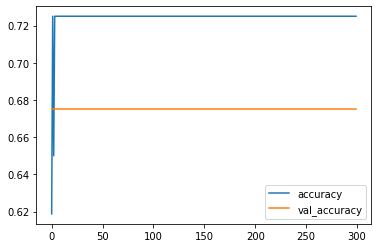

In [11]:
df1 = pd.DataFrame(result.history)
df1[ ["accuracy", "val_accuracy"] ].plot()

In [12]:
# ekstrakcja cech zmiennej niezależnej
from sklearn.feature_selection import SelectKBest, chi2

In [19]:
sb = SelectKBest(chi2, k=10)
X_best = sb.fit_transform(X_train, y_train)

In [20]:
model = Sequential()

model.add( Dense(300, input_dim=X_best.shape[1] , activation="relu") )
model.add( Dropout(.2))

model.add( Dense(16, activation="relu") )


model.add( Dense(1, activation="tanh") )

model.compile(loss="binary_crossentropy", metrics="accuracy")

result = model.fit(X_best, y_train, epochs=300, validation_split=0.2, verbose=0)

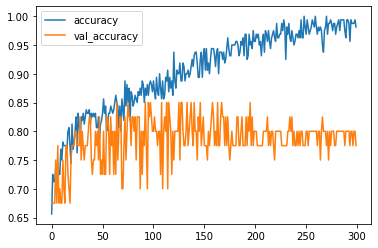

In [21]:
df1 = pd.DataFrame(result.history)
df1[ ["accuracy", "val_accuracy"] ].plot()